# Rainfall Prediction

This project is a machine learning-based weather prediction tool designed to forecast whether it will rain on a given day using key weather parameters. The core of the project is a logistic regression model that has been trained on historical weather data from Australia to predict rainfall (binary Yes/No outcome).

The project features an interactive widget that allows users to input the current day's MaxTemp, MinTemp, and Humidity3pm, then generate a prediction on whether it will rain. The inputs are scaled, processed by the logistic regression model, and the prediction is displayed in a user-friendly format: "Yes, it will rain" or "No, it will not rain."

## Data & Library Import

The dataset used in this project is the Australian Weather dataset, which contains daily weather observations from various locations across Australia.

In [74]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score, precision_recall_curve, auc
import warnings
import time
warnings.filterwarnings('ignore')
c=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266)

In [75]:
#tells pandas to display all columns
pd.set_option('display.max_columns' , None)

In [76]:
#load our dataset for use. Dataset is hosted in github for the purpose of this project.
url = 'https://raw.githubusercontent.com/Dperla-wgu/C964-Capstone/main/weatherAUS.csv'
df = pd.read_csv(url)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Data Pre-processing
With the dataset successfully imported, let's quickly summarize the categories avaible for analysis.

In [77]:
#provide a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Let's clean up this data and remove columns that are not relevant for our purposes

In [78]:
#comment
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)

In [79]:
#remove any null values
df = df.dropna(how='any')
#see how the dataframe looks now
df.shape

(112925, 17)

Let's remove any data outliers

In [80]:
#Outlier removal using Z-score
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.117567  0.108221  0.206661       0.241214      0.577742   
1       0.841802  0.206845  0.276405       0.241214      1.339742   
2       0.037620  0.292772  0.276405       0.391345      0.457900   
3       0.553991  0.622159  0.276405       1.260094      0.500842   
4       0.773137  1.237969  0.160165       0.016018      0.980214   
...          ...       ...       ...            ...           ...   
145454  1.465392  0.265754  0.276405       0.734636      0.021471   
145455  1.577319  0.036615  0.276405       0.734636      0.261157   
145456  1.449403  0.235487  0.276405       1.410225      0.261157   
145457  1.161592  0.464626  0.276405       0.284243      0.740528   
145458  0.777844  0.478947  0.276405       0.959832      0.261157   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.524408     0.190140     1.380413     1.382962     1.142455   
1           0.29131

Next, let's encode categorical variables by converting RainToday and RainTomorrow to binary values (0 for "No" and 1 for "Yes"), and to apply one-hot encoding to categorical columns (WindGustDir, WindDir3pm, and WindDir9am) using pd.get_dummies() for model compatibility.

In [81]:
#encoding categorical variables
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


Now we can standardize the data.

In [82]:
#next step is to standardize our data - using MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,0.577128,0.652284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,0.510638,0.543147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,0.462766,0.565990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,0.515957,0.685279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,0.563830,0.634518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For the purposes of the data tool, we will be looking at these three relevant features:
- MaxTemp
- MinTemp
- Humidity3pm

These features were selected from the following data exploration and analysis.

In [83]:
# Select the three relevant features and target
X = df[['MaxTemp', 'MinTemp', 'Humidity3pm']]
y = df['RainTomorrow']

## Data Exploration & Analysis

Now that the data has be parsed and cleaned, we can begin to look for correlations.

In [84]:
#assess relevant features
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


Of the three top features identified, one of the variables slected will be Humidity3pm.

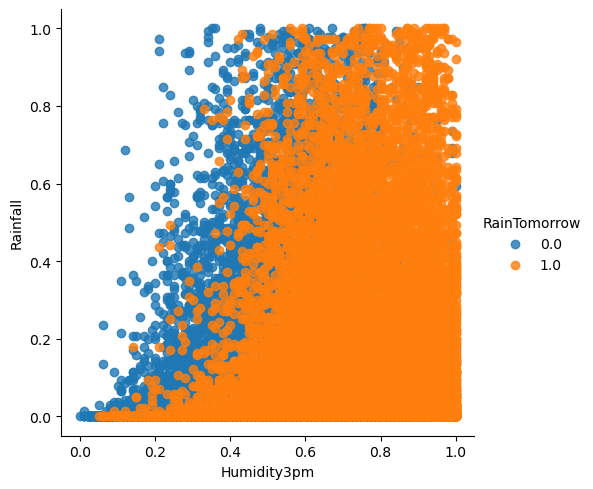

In [85]:
sns.lmplot(x='Humidity3pm', y='Rainfall', data=df, fit_reg=False, hue='RainTomorrow')
plt.show()

After isolating and comparing Humidity to Rainfall, we can see a correlation where both variables positively correlate.

Let's compare two more variables: MaxTemp and MinTemp.

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

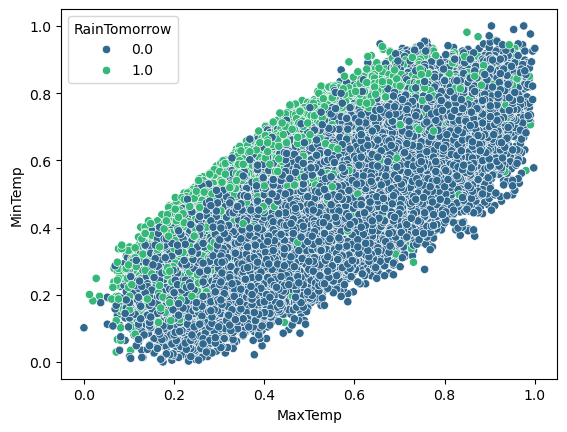

In [86]:
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'viridis', data = df)

Now that we have compared individual columns, let's take a look at the overall dataset. For presentation purposes, any column with "Wind" has been removed.

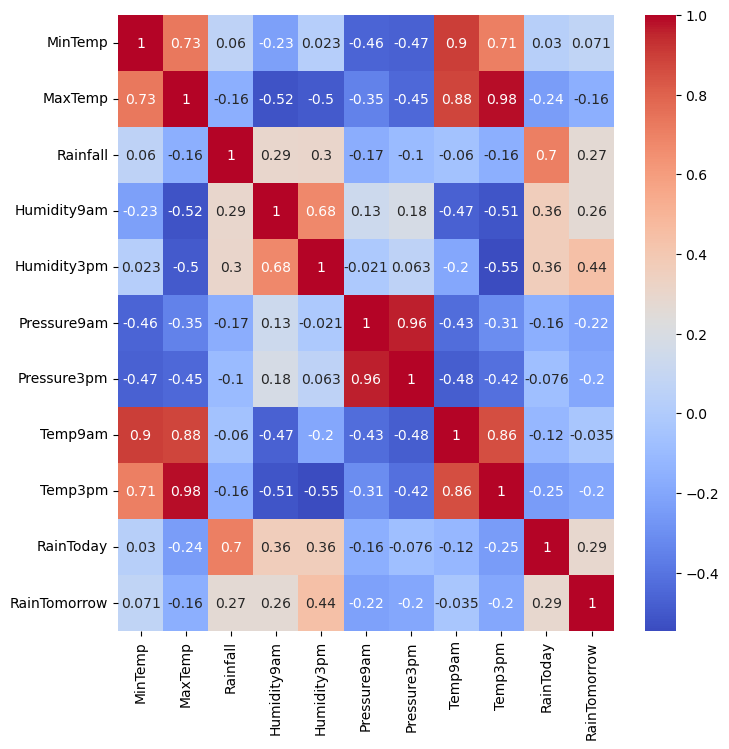

In [87]:
# Filter out columns that begin with 'Wind'
filtered_df = df.loc[:, ~df.columns.str.startswith('Wind')]

# Create the heatmap using the correlation matrix of the filtered DataFrame
plt.figure(figsize=(8,8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Model Development

The machine learning model selected will be Logistic Regression. This model was selected because it is simple, easy to interpret, efficient, and fast.

The first step is to record the current time in seconds so this can be used for comparison when training and testing.

In [88]:
t0=time.time()

Next, the code selects three relevant weather features (MaxTemp, MinTemp, Humidity3pm) and uses them to predict if it will rain tomorrow (RainTomorrow).


It scales the features, splits the data into training and test sets, and trains a logistic regression model to predict rainfall based on these features.

In [89]:
# Select the three relevant features and target
X = df[['MaxTemp', 'MinTemp', 'Humidity3pm']]
y = df['RainTomorrow']

# Scale only the relevant features (MaxTemp, MinTemp, Humidity3pm)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train Logistic Regression model
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

Now, let's use the trained logistic regression model (clf_logreg) to make predictions on the test data.

In [90]:
y_pred = clf_logreg.predict(X_test)


Let's compare the predicted labels (y_pred) with the true labels (y_test) and calculate the accuracy. Accuracy is the proportion of correct predictions.

In [91]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)
print('Time taken:', time.time() - t0)


Accuracy: 0.8366522045462973
Time taken: 0.3830254077911377


With an accuracy of above 80%, the model will work well for our purposes. Lastly, let's visually check our work to see what this kind of accuracy looks like:

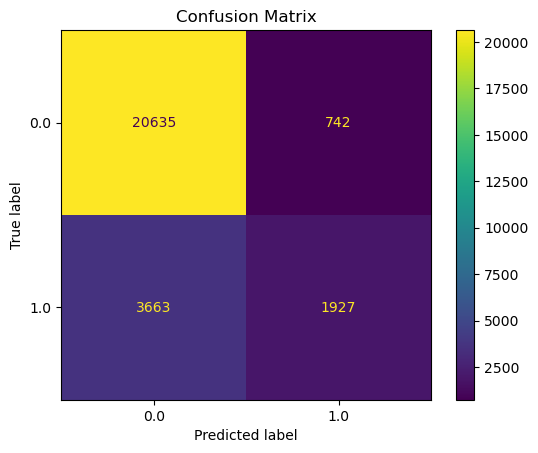

In [92]:
# Generate a confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_logreg, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

## Data Tool

This data tool allows a user to input three weather-related values—MaxTemp, MinTemp, and Humidity3pm—to predict whether it will rain or not. The widget includes three input fields (for the three features) and a button that triggers the prediction when clicked.

Here’s how the widget works:

- Input Fields:
    - MaxTemp: A field where the user enters the maximum temperature.
    - MinTemp: A field where the user enters the minimum temperature.
    - Humidity3pm: A field where the user enters the humidity level at 3 PM.

- Predict Button:
    - Predict Rain: A button labeled "Predict Rain" that the user clicks to generate the prediction.

In [93]:
# Define widget for user input
def predict_rain(MaxTemp, MinTemp, Humidity3pm):
    # Prepare the input data
    input_data = np.array([[MaxTemp, MinTemp, Humidity3pm]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input data

    # Predict if it will rain
    prediction = clf_logreg.predict(input_data_scaled)
    
    # Display the prediction result
    if prediction[0] == 1:
        print("Prediction: Yes, it will rain.")
    else:
        print("Prediction: No, it will not rain.")

# Create input widgets
max_temp_widget = widgets.FloatText(value=60, description='MaxTemp:')
min_temp_widget = widgets.FloatText(value=40, description='MinTemp:')
humidity_widget = widgets.FloatText(value=0, description='Humidity3pm:')
predict_button = widgets.Button(description="Predict Rain")

# Set up event handling for button
def on_button_click(b):
    MaxTemp = max_temp_widget.value
    MinTemp = min_temp_widget.value
    Humidity3pm = humidity_widget.value
    predict_rain(MaxTemp, MinTemp, Humidity3pm)

predict_button.on_click(on_button_click)

# Display widgets
display(max_temp_widget, min_temp_widget, humidity_widget, predict_button)


FloatText(value=60.0, description='MaxTemp:')

FloatText(value=40.0, description='MinTemp:')

FloatText(value=0.0, description='Humidity3pm:')

Button(description='Predict Rain', style=ButtonStyle())

## Application by a News Station for Weather Forecasts

A News Station could use this tool as a simple, user-interactive application on their website or during live broadcasts to:

- Enhance Weather Reports: Reporters can quickly input the day’s key weather values and generate a real-time prediction for rain. This can complement their existing weather models.
- User Engagement: Viewers can interact with the tool on the news station’s website by entering their local weather conditions and getting instant rain predictions for their area. This engages the audience and provides a personalized forecasting experience.
- Weather Prediction Simplicity: The station could present this tool as a simplified version of their complex meteorological models, allowing viewers to understand basic factors like temperature and humidity and their impact on rain predictions.
- Educational Tool: It can also be used in educational segments to explain how data and machine learning are used to predict weather, making viewers more aware of how forecasts are generated.

In summary, the project provides a lightweight, interactive, and educational weather forecasting tool that can be used by a news station to enhance engagement and complement traditional meteorological forecasting.